# **Generación de los pliegues training-validation-test**

importar librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

cargar dataset

In [ ]:
dataset = pd.read_csv('datos.csv')
dataset

,mb,mg,mr,db,dg,dr,sb,sg,sr,kb,kg,kr,c
0,26.417969,26.417969,26.417969,41.486550,34.518124,91.038460,1.594388,2.110576,11.125758,1.197339,6.792588,150.785320,1
1,4.582031,4.582031,4.582031,7.727355,5.974646,6.114876,3.109545,1.296646,4.651993,18.784525,0.727450,43.023453,1
2,9.726562,9.726562,9.726562,11.699502,9.852993,13.492598,0.919229,0.480589,3.039605,-0.334295,-1.219128,21.081585,1
3,262.937500,262.937500,262.937500,517.686340,213.850220,821.961550,6.866479,0.279178,12.647903,76.167800,-1.339278,182.902680,1
4,24.777344,24.777344,24.777344,169.935700,29.421392,80.540080,13.379878,0.893448,13.128305,195.214370,-0.743978,190.643980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,1593.941400,1593.941400,1593.941400,2731.358000,1246.905600,2485.435800,6.829592,-0.124308,8.509929,77.574810,-1.610334,107.507610,0
470,510.996100,510.996100,510.996100,792.421260,586.940800,562.121150,1.411632,0.649146,0.555475,0.592775,-1.111603,-1.237096,0
471,343.699220,343.699220,343.699220,1299.288300,562.407700,536.666930,4.010833,1.416214,1.580491,15.162634,0.433727,0.978769,0
472,114.734375,114.734375,114.734375,332.159970,283.018400,244.696090,3.120450,2.436647,2.096983,8.626758,4.470036,3.013720,0


dividir folder en training:80% y test:20%

In [ ]:
train, test = train_test_split(dataset, test_size = 0.20)

print("Instancias de training: ", len(train))
print("Instancias de test: ", len(test))
print("train\n",train)
print("test\n",test)


Instancias de training:  379
Instancias de test:  95
train
               mb           mg           mr           db           dg  \
75    201.968750   201.968750   201.968750   326.125030   171.721700   
93      0.828125     0.828125     0.828125     1.263115     1.039151   
158    34.179688    34.179688    34.179688    37.568047    47.665485   
267     7.546875     7.546875     7.546875    54.575900    36.683796   
216   244.410160   244.410160   244.410160   521.237240   523.906100   
..           ...          ...          ...          ...          ...   
97     35.523438    35.523438    35.523438    47.097717    59.971474   
168  1000.597660  1000.597660  1000.597660  1260.380000  1080.751100   
236   790.285160   790.285160   790.285160  1228.117900  1041.475700   
210    30.902344    30.902344    30.902344    86.233930    76.822914   
359   679.738300   679.738300   679.738300  2291.760500  1823.704300   

              dr        sb        sg         sr         kb         kg  \
75

dividir training en k=3

In [ ]:

data = {'mb': [],'mg': [],'mr': [],'db': [],'dg': [],'dr': [],
          'sb': [],'sg': [],'sr': [],'kb': [],'kg': [],'kr': [],'c': []}
#crear dataframe
train1 = pd.DataFrame(data)
train2 = pd.DataFrame(data)
train3 = pd.DataFrame(data)
# Iteración por filas del DataFrame:
conta=0
for row in train.itertuples(index=False):
  #print(row)
  nuevaInstancia = {'mb': row[0],'mg': row[1],'mr': row[2],'db': row[3],'dg': row[4],'dr': row[5],
          'sb': row[6],'sg': row[7],'sr': row[8],'kb': row[9],'kg': row[10],'kr': row[11],'c': row[12]}
  
  if conta >= 379//3 and conta <(379//3)*2: #379:es el 80% de instancias que se quedo el training
    #print("+",conta)
    train2 = train2.append(nuevaInstancia, ignore_index=True)
  elif conta >= (379//3)*2:
    #print("*",conta)
    train3 = train3.append(nuevaInstancia, ignore_index=True)
  else:
    #print("-",conta)
    train1 = train1.append(nuevaInstancia, ignore_index=True)
  conta+=1
#convertir tipo de dato de la columna objetivo
train1[['c']] = train1[['c']].astype(np.int64)  
train2[['c']] = train2[['c']].astype(np.int64) 
train3[['c']] = train3[['c']].astype(np.int64) 
#print("conta:",conta)
#print(train1)


<ipython-input-53-c7b7647b2a29>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train1 = train1.append(nuevaInstancia, ignore_index=True)
<ipython-input-53-c7b7647b2a29>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train1 = train1.append(nuevaInstancia, ignore_index=True)
<ipython-input-53-c7b7647b2a29>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train1 = train1.append(nuevaInstancia, ignore_index=True)
<ipython-input-53-c7b7647b2a29>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train1 = train1.append(nuevaInstancia, ignore_index=True)
<ipython-input-53-c7b7647b2a29>:22: FutureWarning: The frame.append method is deprec

mostrar las particiones de training (3)

In [ ]:
train1

,mb,mg,mr,db,dg,dr,sb,sg,sr,kb,kg,kr,c
0,201.968750,201.968750,201.968750,326.125030,171.721700,612.610840,1.338456,0.086644,6.899613,0.201377,-1.534057,66.631615,1
1,0.828125,0.828125,0.828125,1.263115,1.039151,2.373715,1.837360,1.496337,9.993488,3.351714,2.836697,129.310010,1
2,34.179688,34.179688,34.179688,37.568047,47.665485,38.824610,0.902895,1.622253,0.660601,-0.125756,2.264078,-1.039539,2
3,7.546875,7.546875,7.546875,54.575900,36.683796,46.420020,9.662351,7.492622,10.330707,99.837390,64.360310,122.370320,0
4,244.410160,244.410160,244.410160,521.237240,523.906100,485.981100,2.236581,2.180364,1.975066,3.947821,3.671965,2.468038,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,8.531250,8.531250,8.531250,17.909685,14.596627,21.924385,2.413048,1.508022,7.988366,5.669797,0.905864,88.471600,0
122,0.238281,0.238281,0.238281,0.656889,0.546526,0.493967,3.177528,2.509597,1.973192,10.317255,6.464612,3.092850,1
123,20.785156,20.785156,20.785156,42.872593,48.786410,122.139700,2.165582,2.949768,7.506531,3.679752,8.292990,58.880543,1
124,121.429690,121.429690,121.429690,221.019070,173.254040,198.544710,1.753726,1.199793,1.487409,1.718477,0.071502,0.861662,0


In [ ]:
train2

,mb,mg,mr,db,dg,dr,sb,sg,sr,kb,kg,kr,c
0,65.105470,65.105470,65.105470,87.498170,85.425545,92.571175,1.925343,2.081950,2.281502,4.230663,4.466255,5.193835,2
1,179.738280,179.738280,179.738280,1033.546600,858.977600,735.492400,8.808158,7.483848,6.703486,83.531140,61.464333,51.860744,0
2,17.082031,17.082031,17.082031,9.884346,49.482765,60.959297,-0.163345,7.398123,8.625134,-0.495486,65.917140,95.751230,1
3,197.574220,197.574220,197.574220,396.832000,299.825700,346.000820,3.244906,1.187468,2.032424,18.060915,-0.270623,5.957710,0
4,210.050780,210.050780,210.050780,756.689400,96.575060,399.149930,7.730379,-0.424328,7.917877,81.849460,-0.620390,90.403350,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,289.828120,289.828120,289.828120,375.877100,393.621000,371.157530,2.028974,2.486537,2.366682,4.821374,8.000118,7.258927,2
122,909.609400,909.609400,909.609400,1537.330700,1262.301100,1326.386200,1.563347,1.099342,1.204687,0.933950,-0.373399,-0.128668,0
123,8.566406,8.566406,8.566406,20.022144,6.153908,29.682095,3.031170,0.320991,5.319125,10.838178,-0.669596,36.091908,1
124,145.878900,145.878900,145.878900,224.982940,119.882780,524.875400,1.237103,0.377549,10.651304,-0.125577,-1.298205,140.556670,1


In [ ]:
train3

,mb,mg,mr,db,dg,dr,sb,sg,sr,kb,kg,kr,c
0,29.472656,29.472656,29.472656,82.206150,72.789986,73.892130,3.533154,2.744102,2.868056,13.211063,7.008324,7.880338,2
1,9.917969,9.917969,9.917969,23.092651,5.580825,29.012745,2.824276,-0.241962,5.084006,8.143225,-0.430347,32.242860,1
2,129.304690,129.304690,129.304690,200.271150,119.108580,134.670400,1.852947,0.344913,0.527110,5.337953,-1.353609,-1.257692,0
3,79.835940,79.835940,79.835940,817.162200,263.486700,197.849210,11.649906,3.342552,2.602156,141.144680,9.902016,6.012623,0
4,14.730469,14.730469,14.730469,25.179077,26.945866,28.216960,1.976879,2.276215,2.974629,3.656284,5.339747,10.211309,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,35.523438,35.523438,35.523438,47.097717,59.971474,151.616100,1.426912,3.976601,7.882965,0.764697,26.016570,80.890510,1
123,1000.597660,1000.597660,1000.597660,1260.380000,1080.751100,976.642100,1.171040,0.759835,0.547812,-0.080583,-0.673770,-0.857026,2
124,790.285160,790.285160,790.285160,1228.117900,1041.475700,824.214200,1.356027,1.095772,0.481223,0.234106,-0.167271,-1.271756,2
125,30.902344,30.902344,30.902344,86.233930,76.822914,77.891660,3.408444,2.659656,2.787578,12.101098,6.274297,7.153389,2


# **experimentación "Validación cruzada"**

**validación 1**

In [ ]:
#dataframe auxiliar 
trainOfValidation = pd.DataFrame(data)
print("tamaño del training para la validacion 1: ",trainOfValidation.size)
#iteramos en el fold 2 para guardar las instancias en un dataframe auxiliar
for row in train2.itertuples(index=False):
  nuevaInstancia = {'mb': row[0],'mg': row[1],'mr': row[2],'db': row[3],'dg': row[4],'dr': row[5],
          'sb': row[6],'sg': row[7],'sr': row[8],'kb': row[9],'kg': row[10],'kr': row[11],'c': row[12]}
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)

#iteramos en el fold 3 para guardar las instancias en un dataframe auxiliar
for row in train3.itertuples(index=False):
  nuevaInstancia = {'mb': row[0],'mg': row[1],'mr': row[2],'db': row[3],'dg': row[4],'dr': row[5],
          'sb': row[6],'sg': row[7],'sr': row[8],'kb': row[9],'kg': row[10],'kr': row[11],'c': row[12]}
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)

training_2_3_accuracy = []
validation_1_accuracy = []
n_depth = range(1, 15)
print("tamaño del training para la validacion 1: ",trainOfValidation.shape)

tamaño del training para la validacion 1:  0


<ipython-input-57-3723240123f9>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-57-3723240123f9>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-57-3723240123f9>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-57-3723240123f9>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)


tamaño del training para la validacion 1:  (253, 13)


<ipython-input-57-3723240123f9>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-57-3723240123f9>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-57-3723240123f9>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-57-3723240123f9>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=Tr

crear, entrenar modelo y obtener accuracy

In [ ]:
for depth in n_depth:
  #build model
  clf = DecisionTreeClassifier(random_state=0,max_depth=depth)
  clf.fit(trainOfValidation[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, trainOfValidation["c"].values)
  #record training set accuracy and error
  training_2_3_accuracy.append(clf.score(trainOfValidation[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, trainOfValidation["c"].values))
  #record generalization accuracy and error
  validation_1_accuracy.append(clf.score(train1[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train1["c"].values))

graficar accuracy

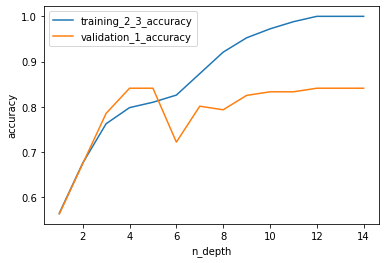

In [ ]:
plt.plot(n_depth, training_2_3_accuracy, label = "training_2_3_accuracy")
plt.plot(n_depth, validation_1_accuracy, label="validation_1_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_depth")
plt.legend()

entrenar el modelo hasta la profundidad donde no hay overfitting

In [ ]:
training_2_3_accuracy = []
validation_1_accuracy = []
n_depth = range(1, 6)

for depth in n_depth:
  #build model
  clf = DecisionTreeClassifier(random_state=0,max_depth=depth)
  clf.fit(trainOfValidation[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, trainOfValidation["c"].values)
  #record training set accuracy and error
  training_2_3_accuracy.append(clf.score(trainOfValidation[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, trainOfValidation["c"].values))
  #record generalization accuracy and error
  validation_1_accuracy.append(clf.score(train1[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train1["c"].values))

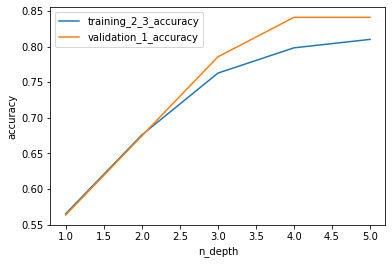

In [ ]:
plt.plot(n_depth, training_2_3_accuracy, label = "training_2_3_accuracy")
plt.plot(n_depth, validation_1_accuracy, label="validation_1_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_depth")
plt.legend()

mostrar accuracy

In [ ]:
accuracyValidation1 = clf.score(train1[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train1["c"].values)
print("Acurracy on training2_3 set: {:.3f}".format(clf.score(trainOfValidation[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, trainOfValidation["c"].values)))
print("Acurracy on validation1 set: {:.3f}".format(accuracyValidation1))
print("Depth: {:.3f}".format(clf.get_depth()))

Acurracy on training2_3 set: 0.810
Acurracy on validation1 set: 0.841
Depth: 5.000


**validación 2**

In [ ]:
#dataframe auxiliar 
trainOfValidation = pd.DataFrame(data)
print("tamaño del training para la validacion 2: ",trainOfValidation.size)
#iteramos en el fold 1 para guardar las instancias en un dataframe auxiliar
for row in train1.itertuples(index=False):
  nuevaInstancia = {'mb': row[0],'mg': row[1],'mr': row[2],'db': row[3],'dg': row[4],'dr': row[5],
          'sb': row[6],'sg': row[7],'sr': row[8],'kb': row[9],'kg': row[10],'kr': row[11],'c': row[12]}
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)

#iteramos en el fold 3 para guardar las instancias en un dataframe auxiliar
for row in train3.itertuples(index=False):
  nuevaInstancia = {'mb': row[0],'mg': row[1],'mr': row[2],'db': row[3],'dg': row[4],'dr': row[5],
          'sb': row[6],'sg': row[7],'sr': row[8],'kb': row[9],'kg': row[10],'kr': row[11],'c': row[12]}
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)

training_1_3_accuracy = []
validation_2_accuracy = []
n_depth = range(1, 15)
print("tamaño del training para la validacion 2: ",trainOfValidation.shape)

tamaño del training para la validacion 2:  0


<ipython-input-65-98511370c5cb>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-65-98511370c5cb>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-65-98511370c5cb>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-65-98511370c5cb>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)


tamaño del training para la validacion 2:  (253, 13)


<ipython-input-65-98511370c5cb>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-65-98511370c5cb>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-65-98511370c5cb>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-65-98511370c5cb>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=Tr

crear, entrenar modelo y obtener accuracy

In [ ]:
for depth in n_depth:
  #build model
  clf = DecisionTreeClassifier(random_state=0,max_depth=depth)
  clf.fit(trainOfValidation[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, trainOfValidation["c"].values)
  #record training set accuracy and error
  training_1_3_accuracy.append(clf.score(trainOfValidation[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, trainOfValidation["c"].values))
  #record generalization accuracy and error
  validation_2_accuracy.append(clf.score(train2[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train2["c"].values))

graficar accuracy

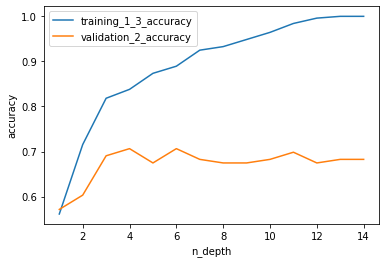

In [ ]:
plt.plot(n_depth, training_1_3_accuracy, label = "training_1_3_accuracy")
plt.plot(n_depth, validation_2_accuracy, label="validation_2_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_depth")
plt.legend()

entrenar el modelo hasta la profundidad donde no hay overfitting

In [ ]:
training_1_3_accuracy = []
validation_2_accuracy = []
n_depth = range(1, 5)

for depth in n_depth:
  #build model
  clf = DecisionTreeClassifier(random_state=0,max_depth=depth)
  clf.fit(trainOfValidation[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, trainOfValidation["c"].values)
  #record training set accuracy and error
  training_1_3_accuracy.append(clf.score(trainOfValidation[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, trainOfValidation["c"].values))
  #record generalization accuracy and error
  validation_2_accuracy.append(clf.score(train2[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train2["c"].values))

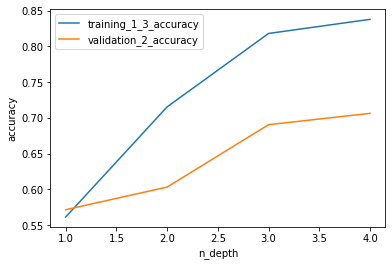

In [ ]:
plt.plot(n_depth, training_1_3_accuracy, label = "training_1_3_accuracy")
plt.plot(n_depth, validation_2_accuracy, label="validation_2_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_depth")
plt.legend()

mostrar accuracy

In [ ]:
accuracyValidation2 = clf.score(train2[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train2["c"].values)
print("Acurracy on training1_3 set: {:.3f}".format(clf.score(trainOfValidation[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, trainOfValidation["c"].values)))
print("Acurracy on validation2 set: {:.3f}".format(clf.score(train2[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train2["c"].values)))
print("Depth: {:.3f}".format(clf.get_depth()))

Acurracy on training1_3 set: 0.838
Acurracy on validation2 set: 0.706
Depth: 4.000


**validación 3**

In [ ]:
#dataframe auxiliar 
trainOfValidation = pd.DataFrame(data)
print("tamaño del training para la validacion 3: ",trainOfValidation.size)
#iteramos en el fold 1 para guardar las instancias en un dataframe auxiliar
for row in train1.itertuples(index=False):
  nuevaInstancia = {'mb': row[0],'mg': row[1],'mr': row[2],'db': row[3],'dg': row[4],'dr': row[5],
          'sb': row[6],'sg': row[7],'sr': row[8],'kb': row[9],'kg': row[10],'kr': row[11],'c': row[12]}
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)

#iteramos en el fold 2 para guardar las instancias en un dataframe auxiliar
for row in train2.itertuples(index=False):
  nuevaInstancia = {'mb': row[0],'mg': row[1],'mr': row[2],'db': row[3],'dg': row[4],'dr': row[5],
          'sb': row[6],'sg': row[7],'sr': row[8],'kb': row[9],'kg': row[10],'kr': row[11],'c': row[12]}
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)

training_1_2_accuracy = []
validation_3_accuracy = []
n_depth = range(1, 15)
print("tamaño del training para la validacion 3: ",trainOfValidation.shape)

tamaño del training para la validacion 3:  0


<ipython-input-71-2865ff64db8d>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-71-2865ff64db8d>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-71-2865ff64db8d>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-71-2865ff64db8d>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)


tamaño del training para la validacion 3:  (252, 13)


<ipython-input-71-2865ff64db8d>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-71-2865ff64db8d>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-71-2865ff64db8d>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=True)
<ipython-input-71-2865ff64db8d>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainOfValidation = trainOfValidation.append(nuevaInstancia, ignore_index=Tr

crear, entrenar modelo y obtener accuracy

In [ ]:
for depth in n_depth:
  #build model
  clf = DecisionTreeClassifier(random_state=0,max_depth=depth)
  clf.fit(trainOfValidation[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, trainOfValidation["c"].values)
  #record training set accuracy and error
  training_1_2_accuracy.append(clf.score(trainOfValidation[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, trainOfValidation["c"].values))
  #record generalization accuracy and error
  validation_3_accuracy.append(clf.score(train3[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train3["c"].values))

graficar accuracy

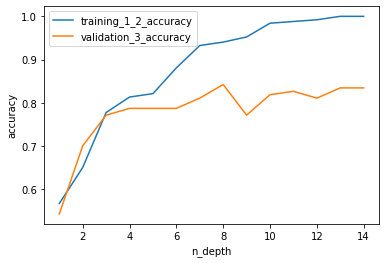

In [ ]:
plt.plot(n_depth, training_1_2_accuracy, label = "training_1_2_accuracy")
plt.plot(n_depth, validation_3_accuracy, label="validation_3_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_depth")
plt.legend()

entrenar el modelo hasta la profundidad donde no hay overfitting

In [ ]:
training_1_2_accuracy = []
validation_3_accuracy = []
n_depth = range(1, 9)

for depth in n_depth:
  #build model
  clf = DecisionTreeClassifier(random_state=0,max_depth=depth)
  clf.fit(trainOfValidation[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, trainOfValidation["c"].values)
  #record training set accuracy and error
  training_1_2_accuracy.append(clf.score(trainOfValidation[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, trainOfValidation["c"].values))
  #record generalization accuracy and error
  validation_3_accuracy.append(clf.score(train3[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train3["c"].values))

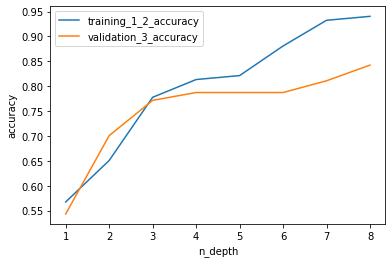

In [ ]:
plt.plot(n_depth, training_1_2_accuracy, label = "training_1_2_accuracy")
plt.plot(n_depth, validation_3_accuracy, label="validation_3_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_depth")
plt.legend()

mostrar accuracy

In [ ]:
accuracyValidation3 = clf.score(train3[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train3["c"].values)

print("Acurracy on training1_2 set: {:.3f}".format(clf.score(trainOfValidation[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, trainOfValidation["c"].values)))
print("Acurracy on validation3 set: {:.3f}".format(clf.score(train3[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train3["c"].values)))
print("Depth: {:.3f}".format(clf.get_depth()))

Acurracy on training1_2 set: 0.940
Acurracy on validation3 set: 0.843
Depth: 8.000


# **experimentación con train:80% y test:20%**

crear, entrenar modelo y obtener accuracy

In [ ]:
training_accuracy = []
test_accuracy = []
n_depth = range(1, 20)
for depth in n_depth:
  #build model
  clf = DecisionTreeClassifier(random_state=0,max_depth=depth)
  clf.fit(train[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train["c"].values)
  #record training set accuracy and error
  training_accuracy.append(clf.score(train[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train["c"].values))
  #record generalization accuracy and error
  test_accuracy.append(clf.score(test[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, test["c"].values))

graficar accuracy

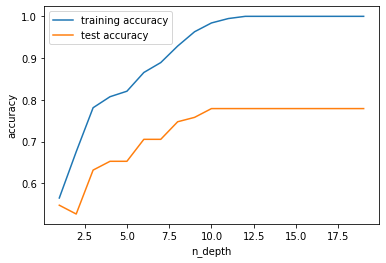

In [ ]:
plt.plot(n_depth, training_accuracy, label = "training accuracy")
plt.plot(n_depth, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_depth")
plt.legend()

entrenar el modelo hasta la profundidad donde no hay overfitting

In [ ]:
training_accuracy = []
test_accuracy = []
limOverfitting = range(1,11)
for depth in limOverfitting:
  #build model
  clf = DecisionTreeClassifier(random_state=0,max_depth=depth)
  clf.fit(train[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train["c"].values)
  #record training set accuracy and error
  training_accuracy.append(clf.score(train[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train["c"].values))
  #record generalization accuracy and error
  test_accuracy.append(clf.score(test[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, test["c"].values))

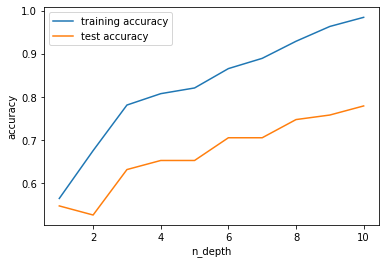

In [ ]:
plt.plot(limOverfitting, training_accuracy, label = "training accuracy")
plt.plot(limOverfitting, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_depth")
plt.legend()

mostrar accuracy

In [ ]:
accuracyTest = clf.score(test[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, test["c"].values)

print("Acurracy on training set: {:.3f}".format(clf.score(train[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, train["c"].values)))
print("Acurracy on test set: {:.3f}".format(clf.score(test[["mb","mg","mr","db","dg","dr","sb","sg","sr","kb","kg","kr"]].values, test["c"].values)))
print("Depth: {:.3f}".format(clf.get_depth()))

Acurracy on training set: 0.984
Acurracy on test set: 0.779
Depth: 10.000


# **conclusión**

estadística de los K-folds

In [ ]:
validationScores = [accuracyValidation1,accuracyValidation2,accuracyValidation3]
print(validationScores)
print("Media de los scores: ",np.mean(validationScores))
print("Desviación estandar de los scores: ",np.std(validationScores))

[0.8412698412698413, 0.7063492063492064, 0.84251968503937]
Media de los scores:  0.7967129108861393
Desviación estandar de los scores:  0.0638988255008944


podemos observar que el modelo final esta dentro de la desviación estandar obtenida anteriormente

In [ ]:
print(accuracyTest)

0.7789473684210526
